In [1]:
from glob import glob
from collections import Counter
from collections import defaultdict

import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import anndata as ad
import numpy as np
import scipy.sparse as sp
import seaborn as sns


# Read and merge data

In [2]:
files = sorted(glob('../data/CoDi/*.h5ad'))
adata_list = [sc.read_h5ad(file) for file in files] # Load AnnData objects

In [4]:
sample_names = ['Sample 1 - 40 nm NPs', 'Sample 2 - 200 nm NPs', 'Sample 3 - 40 + 200 nm NPs', 'Sample 4 - control']
samples = []
for i, adata in enumerate(adata_list):
    sample = f'sample_{i+1}'
    adata.obs['sample'] = sample # Add a column 'sample' to keep track of the sample source
    adata.obs.index = [f"{f'sample_{i+1}'}_{x}" for x in adata.obs.index]  # Modify the index to be unique
    samples.append(sample)
# Merge all AnnData objects
merged_adata =  ad.concat(adata_list, axis=0, join='inner')  # adata_list[0].concatenate(adata_list[1:], join='inner', index_unique=None)
# merged_adata.write_h5ad('../data/merged.h5ad', compression='gzip')

/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtyp

/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


CD4+ T cell, 0: 27 (0.44%)
Cytotoxic T cell, 0: 7 (0.88%)
B cell, 0: 57 (0.52%)
Monocytes, 0: 45 (0.44%)
Natural killer cell, 0: 22 (0.22%)
--------------------------------------------------


/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


CD4+ T cell, 1: 31 (0.5%)
Cytotoxic T cell, 1: 5 (0.62%)
B cell, 1: 60 (0.55%)
Monocytes, 1: 59 (0.58%)
Natural killer cell, 1: 20 (0.2%)
--------------------------------------------------


/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


CD4+ T cell, 2: 26 (0.42%)
Cytotoxic T cell, 2: 6 (0.75%)
B cell, 2: 63 (0.57%)
Monocytes, 2: 46 (0.45%)
Natural killer cell, 2: 9 (0.09%)
--------------------------------------------------


/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


CD4+ T cell, 3: 25 (0.4%)
Cytotoxic T cell, 3: 7 (0.88%)
B cell, 3: 60 (0.55%)
Monocytes, 3: 61 (0.6%)
Natural killer cell, 3: 39 (0.4%)
--------------------------------------------------


/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


CD4+ T cell, 0: 28 (0.45%)
Cytotoxic T cell, 0: 6 (0.75%)
B cell, 0: 57 (0.52%)
Monocytes, 0: 46 (0.45%)
Natural killer cell, 0: 35 (0.36%)
--------------------------------------------------


/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


CD4+ T cell, 1: 31 (0.5%)
Cytotoxic T cell, 1: 5 (0.62%)
B cell, 1: 60 (0.55%)
Monocytes, 1: 59 (0.58%)
Natural killer cell, 1: 33 (0.34%)
--------------------------------------------------


/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


CD4+ T cell, 2: 29 (0.47%)
Cytotoxic T cell, 2: 6 (0.75%)
B cell, 2: 63 (0.57%)
Monocytes, 2: 46 (0.45%)
Natural killer cell, 2: 34 (0.35%)
--------------------------------------------------


/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


CD4+ T cell, 3: 25 (0.4%)
Cytotoxic T cell, 3: 6 (0.75%)
B cell, 3: 61 (0.55%)
Monocytes, 3: 63 (0.62%)
Natural killer cell, 3: 44 (0.45%)
--------------------------------------------------


/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


CD4+ T cell, 0: 24 (0.39%)
Cytotoxic T cell, 0: 7 (0.88%)
B cell, 0: 56 (0.51%)
Monocytes, 0: 45 (0.44%)
Natural killer cell, 0: 0 (0.0%)
--------------------------------------------------


/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


CD4+ T cell, 1: 30 (0.48%)
Cytotoxic T cell, 1: 5 (0.62%)
B cell, 1: 58 (0.53%)
Monocytes, 1: 58 (0.57%)
Natural killer cell, 1: 0 (0.0%)
--------------------------------------------------


/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


CD4+ T cell, 2: 24 (0.39%)
Cytotoxic T cell, 2: 6 (0.75%)
B cell, 2: 54 (0.49%)
Monocytes, 2: 49 (0.48%)
Natural killer cell, 2: 0 (0.0%)
--------------------------------------------------


/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


CD4+ T cell, 3: 23 (0.37%)
Cytotoxic T cell, 3: 6 (0.75%)
B cell, 3: 59 (0.54%)
Monocytes, 3: 58 (0.57%)
Natural killer cell, 3: 0 (0.0%)
--------------------------------------------------


/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


CD4+ T cell, 0: 27 (0.44%)
Cytotoxic T cell, 0: 5 (0.62%)
B cell, 0: 56 (0.51%)
Monocytes, 0: 46 (0.45%)
Natural killer cell, 0: 0 (0.0%)
--------------------------------------------------


/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


CD4+ T cell, 1: 30 (0.48%)
Cytotoxic T cell, 1: 5 (0.62%)
B cell, 1: 60 (0.55%)
Monocytes, 1: 58 (0.57%)
Natural killer cell, 1: 0 (0.0%)
--------------------------------------------------


/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


CD4+ T cell, 2: 28 (0.45%)
Cytotoxic T cell, 2: 6 (0.75%)
B cell, 2: 62 (0.56%)
Monocytes, 2: 48 (0.47%)
Natural killer cell, 2: 0 (0.0%)
--------------------------------------------------


/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


CD4+ T cell, 3: 29 (0.47%)
Cytotoxic T cell, 3: 6 (0.75%)
B cell, 3: 60 (0.55%)
Monocytes, 3: 63 (0.62%)
Natural killer cell, 3: 0 (0.0%)
--------------------------------------------------


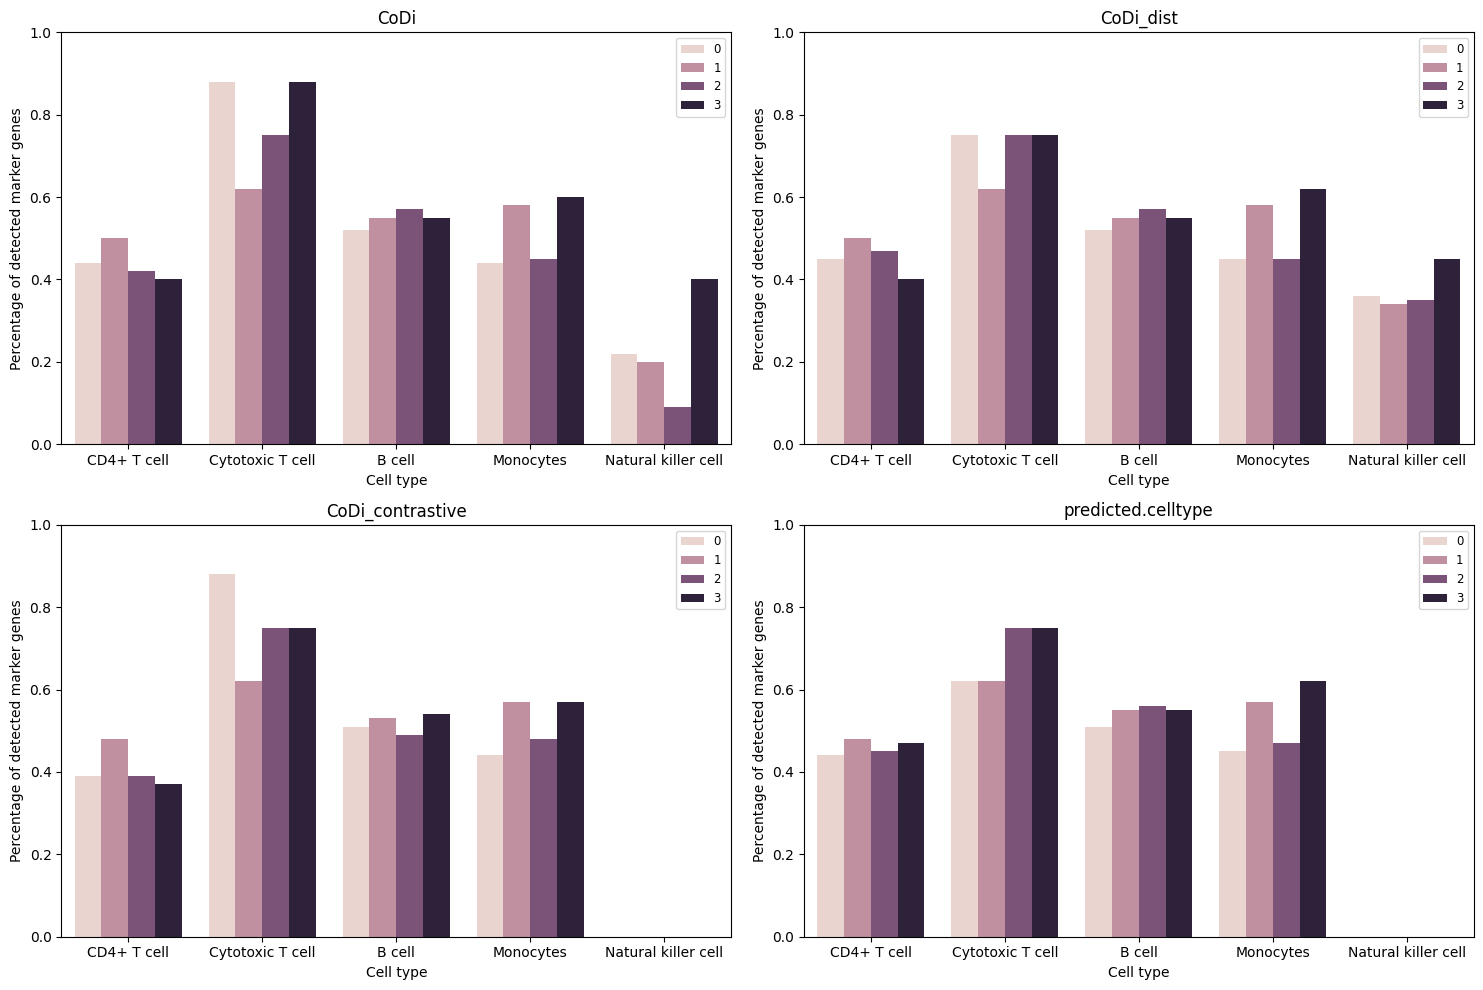

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # Create a 2x2 grid for subplots
axes = axes.flatten()  # Flatten to easily index the axes

df_all = pd.DataFrame(columns=['Tool', 'Cell type', 'sample ID', 'Number of marker gene', 'Percentage of detected marker genes'])
cnt = 0

for idx, annotation in enumerate(['CoDi', 'CoDi_dist', 'CoDi_contrastive', 'predicted.celltype']):
    threshold = 15
    ref_markers_df = pd.read_csv('../data/CoDi/PanglaoDB_markers_27_Mar_2020.tsv', sep='\t')  # Reference markers
    mapping = {
        'CD4+ T cell': 'T helper cells',
        'Cytotoxic T cell': 'T cytotoxic cells',
        'B cell': 'B cells',
        'Natural killer cell': 'NK cells',
        'Monocytes': 'Monocytes'
    }
    mapping = {v: k for k, v in mapping.items()}  # Switch keys and values
    ref_markers_df['cell type'] = ref_markers_df['cell type'].map(mapping)



    for snum, adata in enumerate(adata_list):
        adata.obs[annotation] = adata.obs[annotation].apply(
            lambda x: 'Monocytes' if 'monocyte' in x else x
        )
        group_counts = adata.obs[annotation].value_counts()
        adata.obs[annotation] = adata.obs[annotation].apply(
            lambda x: x if group_counts[x] >= threshold else 'Other'
        )
        adata = adata[adata.obs[annotation] != 'Other'].copy()
        adata.obs[annotation] = adata.obs[annotation].astype('category')
        sc.tl.rank_genes_groups(adata, groupby=annotation, method='wilcoxon')

        for cell_type in ['CD4+ T cell', 'Cytotoxic T cell', 'B cell', 'Monocytes', 'Natural killer cell']:
            ref_markers_subset = set(ref_markers_df[(ref_markers_df['organ'] == 'Immune system') & 
                                                    (ref_markers_df['cell type'] == cell_type)]['official gene symbol'])

            if cell_type in adata.obs[annotation].unique():
                marker_genes_subset_df = sc.get.rank_genes_groups_df(adata, group=cell_type)
                marker_genes_subset_df = marker_genes_subset_df[marker_genes_subset_df['pvals_adj'] < 0.05]
                marker_genes_subset = set(marker_genes_subset_df['names'])
            else:
                marker_genes_subset = set()

            num_marker_genes = len(marker_genes_subset.intersection(ref_markers_subset))
            perc = np.round(num_marker_genes / len(ref_markers_subset), 2)
            print(f'{cell_type}, {snum}: {num_marker_genes} ({perc}%)')
            df_all.loc[cnt, :] = [annotation, cell_type, snum, num_marker_genes, perc]
            cnt += 1
        print('-' * 50)

    sns.barplot(data=df_all[df_all['Tool'] == annotation], x='Cell type', y='Percentage of detected marker genes', 
                hue='sample ID', ax=axes[idx])
    axes[idx].set_title(annotation)
    axes[idx].set_ylim(0, 1)  # Set consistent y-axis limits for percentage
    axes[idx].legend(loc='upper right', fontsize='small')

plt.tight_layout()  # Adjust layout to avoid overlap
plt.savefig('detected_marker_genes.png', dpi=150, bbox_inches='tight')
plt.show()


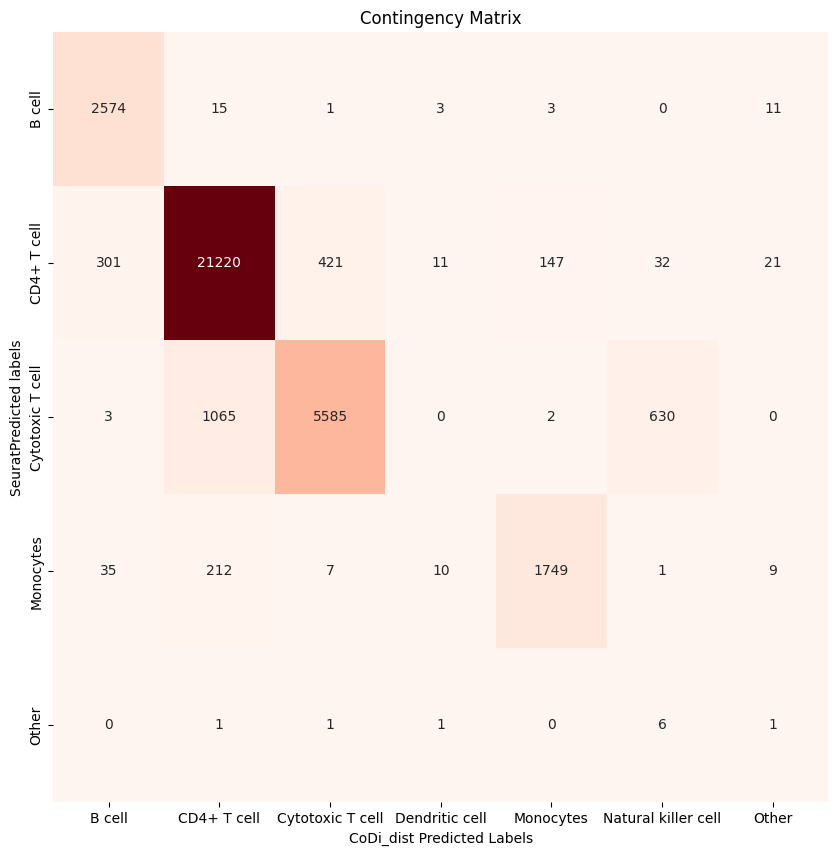

In [5]:
from sklearn.metrics.cluster import contingency_matrix
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
# Contingency matrix
cm = contingency_matrix(merged_adata.obs.loc[:, 'predicted.celltype'], merged_adata.obs.loc[:, 'CoDi_dist'])
# Visualize the confusion matrix using Seaborn
class_labels_y = np.unique(merged_adata.obs.loc[:, 'predicted.celltype'])
class_labels_x = np.unique(merged_adata.obs.loc[:, 'CoDi_dist'])


sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False, xticklabels=class_labels_x, yticklabels=class_labels_y, ax=axs)
ax=axs.set_xlabel("CoDi_dist Predicted Labels")
ax=axs.set_ylabel("SeuratPredicted labels")
ax=axs.set_title("Contingency Matrix")

In [4]:
adata_combined = sc.read_h5ad('../data/merged.h5ad')

samples = sorted(adata_combined.obs['sample'].unique())
adata_list = [adata_combined[adata_combined.obs['sample'] == sample] for sample in samples]

# before = adata_combined.X.copy()
# sc.pp.combat(adata_combined, key='sample', inplace=True)

df_expression = pd.DataFrame(adata_combined.X.toarray(), index=adata_combined.obs.index, columns=adata_combined.var.index).T
# run pyComBat
df_corrected = pycombat(df_expression, adata_combined.obs['sample'].values)


# after = df_corrected
# print((before != after).sum())  # Count changes


Found 4 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:377: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)
/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Created PCA components in .obsm.X_pca


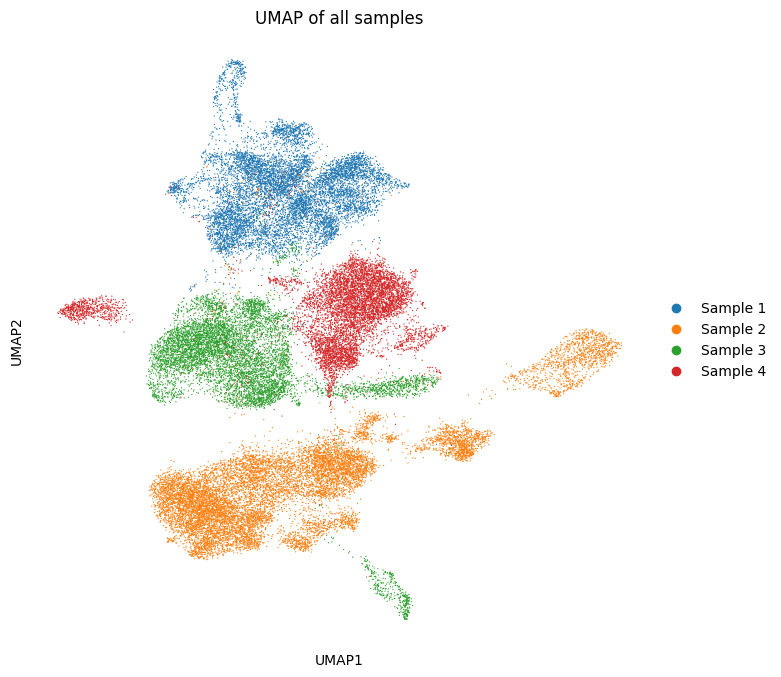

In [7]:
adata_corrected = adata_combined.copy()
adata_corrected.X = df_corrected.T.values
adata_corr_umap = calc_umap(adata_corrected)
plot_umap(adata_corr_umap)

837100000


/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:377: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


Created PCA components in .obsm.X_pca


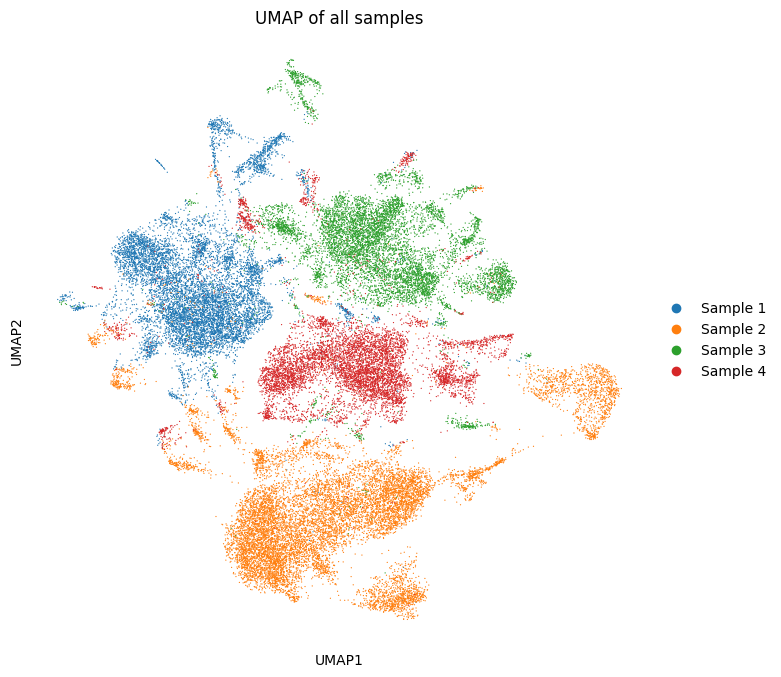

In [23]:
# 4 times

adata_combined = sc.read_h5ad('../data/merged.h5ad')
samples = sorted(adata_combined.obs['sample'].unique())
adata_list = [adata_combined[adata_combined.obs['sample'] == sample] for sample in samples]

before = adata_combined.X.copy()
for i in range(4):
    sc.pp.combat(adata_combined, key='sample', inplace=True)
after = adata_combined.X
print((before != after).sum())  # Count changes
adata_corr_umap2 = calc_umap(adata_combined)
plot_umap(adata_corr_umap2)

/root/miniconda3/envs/CoDi/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:377: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


Created PCA components in .obsm.X_pca


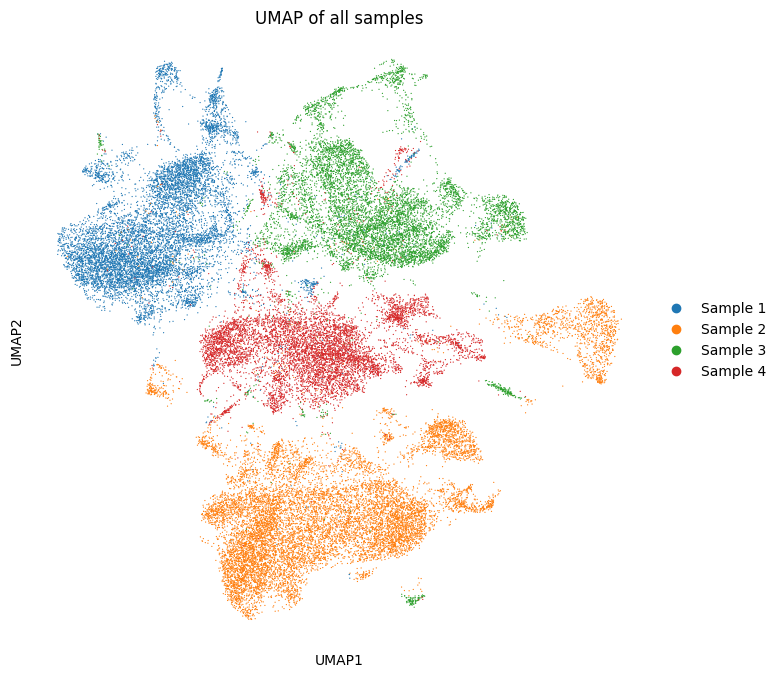

In [25]:
adata_combined = sc.read_h5ad('../data/merged.h5ad')
samples = sorted(adata_combined.obs['sample'].unique())
adata_list = [adata_combined[adata_combined.obs['sample'] == sample] for sample in samples]
adata_corrected = adata_combined.copy()
sc.pp.combat(adata_corrected, key='sample', inplace=True)
adata_corr_umap = calc_umap(adata_corrected)
plot_umap(adata_corr_umap)

In [ ]:
adata_combined = sc.read_h5ad('../data/merged.h5ad')
# Normalize and log-transform the raw counts
sc.pp.normalize_total(adata_combined, target_sum=1e4)
sc.pp.log1p(adata_combined)
samples = sorted(adata_combined.obs['sample'].unique())
adata_list = [adata_combined[adata_combined.obs['sample'] == sample] for sample in samples]
adata_corrected = adata_combined.copy()
sc.pp.combat(adata_corrected, key='sample', inplace=True)
adata_corr_umap = calc_umap(adata_corrected.copy())
plot_umap(adata_corr_umap, 'umap_corr.png')
# adata_corrected.write_h5ad('../data/merged_batch_corrected.h5ad', compression='gzip')

In [117]:
Counter(merged_adata.obs['predicted.celltype'])

Counter({'CD4+ T cell': 21564,
         'Cytotoxic T cell': 12202,
         'B cell': 2449,
         'CD14+ monocyte': 996,
         'Natural killer cell': 821,
         'Megakaryocyte': 15,
         'Plasmacytoid dendritic cell': 3})